In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.shape

(100, 4)

In [4]:
##Steps
# 1. Preprocessing  +EDA + Feature selection
# 2.Extract input and output columns
# 3. Scale the values
# 4. Train test split
# 5. Train the model
# 6. Evaluate the model/model selection
# 7.Deploy the model

In [5]:
# 1. preprocessing
# To check if we have any missing values so that we can remove it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
df=df.iloc[:,1:]  #all rows but columns starting from 1

In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [8]:
import matplotlib.pyplot as plt

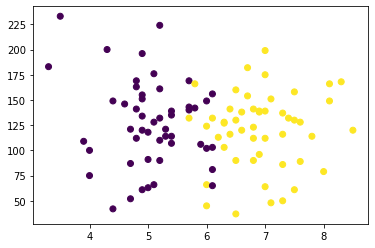

In [9]:
#EDA to get to know which type of algo might be used . Here, logistic regression can be used
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [10]:
# 2.Extract input and output columns
x=df.iloc[:,0:2]  #input colums/independent column
y=df.iloc[:,-1]   #output column/dependent column

In [11]:
# 4.Trian the split-->so that we could check after if the model is working 
#                     well or not.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) # gets 10% of the data for model checking



In [12]:
x_test

,cgpa,iq
14,6.1,103.0
60,6.9,139.0
36,5.7,140.0
59,4.8,112.0
6,5.7,143.0
50,3.5,233.0
78,6.1,81.0
89,4.9,151.0
24,4.7,121.0
58,8.0,79.0


In [13]:
# 3. Scale the values-->so that we can get all input column data in the same range

In [14]:
from sklearn.preprocessing import StandardScaler


In [15]:
scaler=StandardScaler()

In [16]:
x_train=scaler.fit_transform(x_train)  #fits x_train in a certain range
                                       #as well as transform the x_train

In [17]:
x_train

array([[ 0.86259053,  0.40971201],
       [-0.56023921, -0.4018221 ],
       [-1.80521523, -1.21335621],
       [-0.82701979,  0.13074716],
       [-0.73809293, -0.8329496 ],
       [-1.27165408,  0.5872351 ],
       [-1.0048735 ,  0.81547907],
       [-1.4495078 , -2.05025077],
       [ 0.32902938, -0.17357813],
       [ 0.41795624, -0.8329496 ],
       [-0.73809293,  0.23218893],
       [ 0.59580995,  0.79011863],
       [-0.02667806, -1.97416945],
       [ 0.77366367, -0.68078695],
       [ 0.77366367,  0.38435157],
       [ 2.19649341, -0.07213637],
       [ 1.84078597,  0.66331643],
       [ 0.68473681, -0.27501989],
       [ 2.01863969,  1.14516481],
       [-0.82701979, -1.44160018],
       [ 0.68473681, -0.8329496 ],
       [-1.0048735 , -0.07213637],
       [ 0.68473681,  0.4604329 ],
       [ 0.86259053,  1.32268789],
       [ 0.95151739, -1.89808812],
       [-0.29345863,  1.17052525],
       [-1.18272722, -1.79664636],
       [ 0.95151739,  0.71403731],
       [ 0.86259053,

In [18]:
x_test=scaler.fit_transform(x_test)

In [19]:
x_test

array([[ 0.38461754, -0.64954402],
       [ 1.0535176 ,  0.21014659],
       [ 0.0501675 ,  0.23402689],
       [-0.70234507, -0.43462137],
       [ 0.0501675 ,  0.30566777],
       [-1.78930767,  2.45489431],
       [ 0.38461754, -1.17491051],
       [-0.61873256,  0.49671013],
       [-0.78595757, -0.21969871],
       [ 1.97325518, -1.2226711 ]])

In [20]:
# 5. Train the model
from sklearn.linear_model import LogisticRegression

In [21]:
clf=LogisticRegression()

In [22]:
clf.fit(x_train,y_train)  #training the model

LogisticRegression()

In [23]:
y_pred=clf.predict(x_test)  #giving the prediction

In [24]:
y_test

14    0
60    1
36    0
59    0
6     0
50    0
78    0
89    0
24    0
58    1
Name: placement, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.6

<AxesSubplot:>

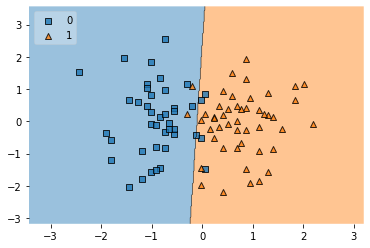

In [29]:
#import mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [30]:
import pickle

In [31]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
#pip install mlxtend